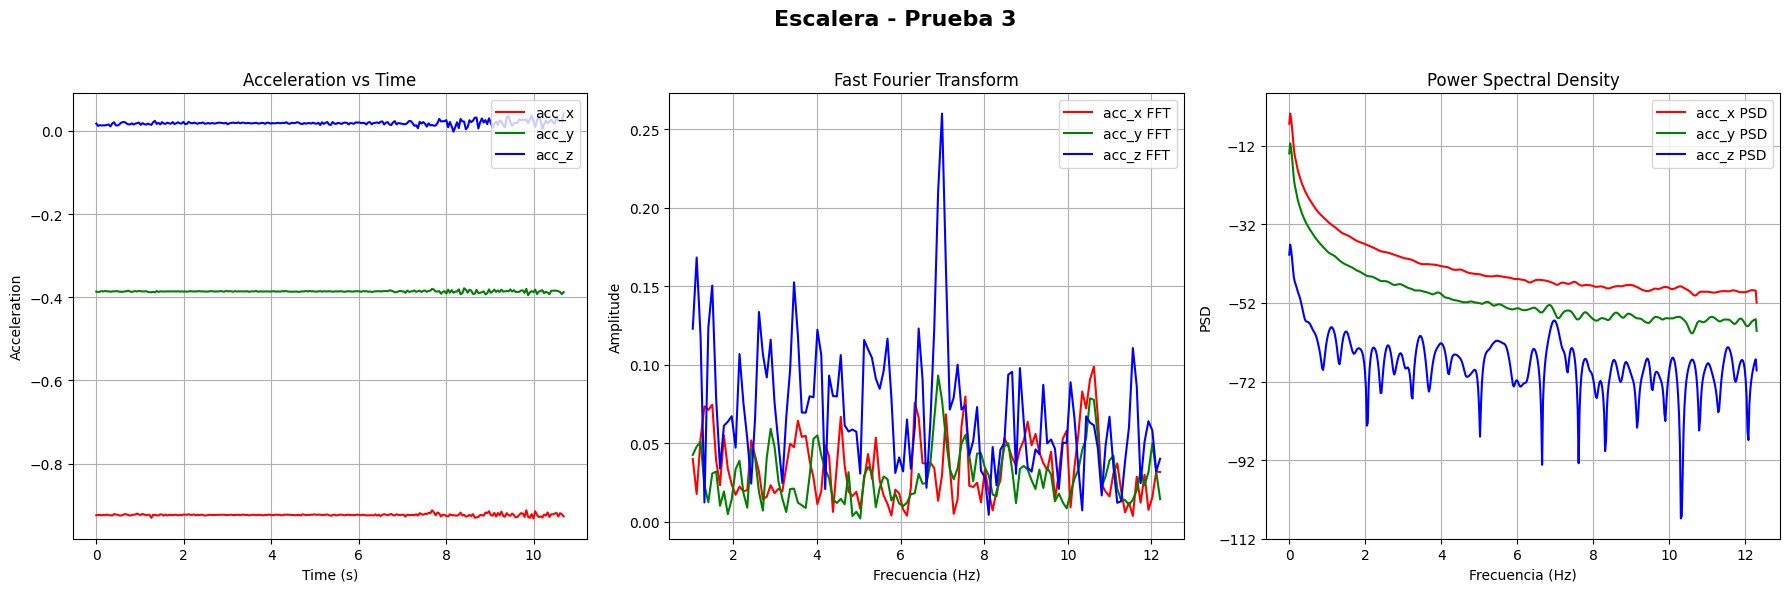

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/Arakistech/ASCENSORELGOIBAR/refs/heads/main/Datos%20vibraci%C3%B3n/Datos%20escalera%20mec%C3%A1nica%2021_1_2025/21-01-2025T140433.csv"

# DATAFRAME DEL ARCHIVO A LEER (CON SUS RESPECTIVAS COLUMNAS)
df = pd.read_csv(url)

# FOURIER
acc_x_fft = np.fft.fft(df['acc_x'])
acc_y_fft = np.fft.fft(df['acc_y'])
acc_z_fft = np.fft.fft(df['acc_z'])

dt = df['time'].iloc[1] - df['time'].iloc[0]
fs = 1 / dt
n = len(df['time'])
frecuencias = np.fft.fftfreq(n, dt)

frecuencias_positivas = frecuencias[:n//2]
acc_x_fft = np.abs(acc_x_fft)[:n//2]
acc_y_fft = np.abs(acc_y_fft)[:n//2]
acc_z_fft = np.abs(acc_z_fft)[:n//2]

filtro = frecuencias_positivas > 1

frecuencias_positivas = frecuencias_positivas[filtro]
acc_x_fft = acc_x_fft[filtro]
acc_y_fft = acc_y_fft[filtro]
acc_z_fft = acc_z_fft[filtro]

# Crear la figura y la estructura de subgráficos en una sola fila de 3 columnas
plt.figure(figsize=(18, 6))

# Gráfico 1: Acceleration vs Time
plt.subplot(1, 3, 1)
plt.plot(df['time'], df['acc_x'], color='red', label='acc_x')
plt.plot(df['time'], df['acc_y'], color='green', label='acc_y')
plt.plot(df['time'], df['acc_z'], color='blue', label='acc_z')
plt.title('Acceleration vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)

# Gráfico 2: Fast Fourier Transform
plt.subplot(1, 3, 2)
plt.plot(frecuencias_positivas, acc_x_fft, color='red', label='acc_x FFT')
plt.plot(frecuencias_positivas, acc_y_fft, color='green', label='acc_y FFT')
plt.plot(frecuencias_positivas, acc_z_fft, color='blue', label='acc_z FFT')
plt.title('Fast Fourier Transform')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Gráfico 3: Power Spectral Density
plt.subplot(1, 3, 3)
frequencies, power_x = plt.psd(df['acc_x'], NFFT=1024, Fs=fs, color='red', label='acc_x PSD')
frequencies, power_y = plt.psd(df['acc_y'], NFFT=1024, Fs=fs, color='green', label='acc_y PSD')
frequencies, power_z = plt.psd(df['acc_z'], NFFT=1024, Fs=fs, color='blue', label='acc_z PSD')
filtro_power = frequencies > 1
frequencies_filtrado = frequencies[filtro_power]
power_x_filtrado = power_x[:len(frequencies_filtrado)]
power_y_filtrado = power_y[:len(frequencies_filtrado)]
power_z_filtrado = power_z[:len(frequencies_filtrado)]
plt.title('Power Spectral Density')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)

# Título general en negrita
plt.suptitle('Escalera - Prueba 4', fontsize=16, fontweight='bold')

# Ajustar el layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()
